In [2]:
#import modules
import numpy as np
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

try:
  from empiricaldist import Pmf
except:
  !pip install empiricaldist

def convert_pmf_df(pmf):
  results=pd.DataFrame(columns=['probs'])
  results['probs']=pmf
  return results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=31fdfe4b94a890f0994ea241de592144d9ccf539cb35cf3068a31dae21501b83
  Stored in directory: /root/.cache/pip/wheels/dd/dc/1c/c472efa84814edbb5b67d132ad3950534d0d7fd808543a659c
Successfully built empiricaldist


# **Exercises**

##### _Exercise 4-1_
In Major League Baseball(MLB), most players have a batting average between .200 and .330, which their probability of getting a hit is between 0.2 and 0.33.

Suppose a player appearing in their first game gets 3 hits out of 3 attempts. What is the posterior distribution for their probability of getting a hit? 

* Probability of a hit is $p$ and the batter gets $n$ strikes. The probability that we get a total of $k$ hits is given by **binomial distribution** 
\begin{equation}
{n\choose k}p^k(1-p)^{n-k} 
\end{equation}

for any value of $k$ from 0 to $n$, including both. ( Term ${n\choose k}$ means $n$ choose $k$)

For Example, if we have $n=3$ hits and the prob of hitting the ball everytime is $p=0.5$, here's the probabilty of getting $k=3$ hits:

We can get hypothesis based on premises below:

1. HHH (all hit) ``3 hits``
2. HMH (2 hits, 1 miss) `` 2 hits``
3. MMH (2 misses, 1 hit) ``1 hit ``
4. MMM (all missed) ``0 hit``

So, based on the above hypotheses, the probability of getting a hit on each chances are based on 0,1,2,3 hits.

In [76]:
hypos41 = np.linspace(0.1, 0.4, 101)
prior41 = Pmf(1, hypos41)

In [77]:
likelihood41 = {
    'H': hypos41,
    'M': 1-hypos41
}

In [78]:
dataset41 = 'H' * 25 + 'M' * 75

In [79]:
for data in dataset41:
    prior41 *= likelihood41[data]

prior41.normalize()

1.3596964206970507e-23

Text(0, 0.5, 'PMF')

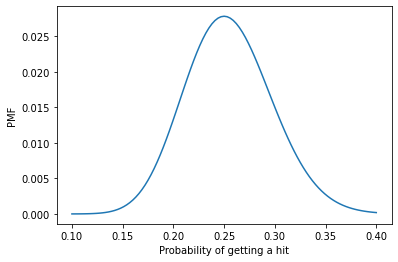

In [80]:
prior41.plot(label='prior')
plt.xlabel('Probability of getting a hit')
plt.ylabel('PMF')

In [81]:
posterior41 = prior41.copy()

for data in 'HHH':
    posterior41 *= likelihood41[data]

posterior41.normalize()

0.017944179687707326

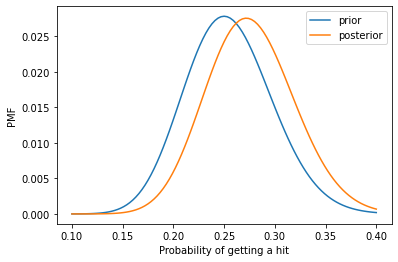

In [83]:
prior41.plot(label='prior')
posterior41.plot(label='posterior ')
plt.xlabel('Probability of getting a hit')
plt.ylabel('PMF')
plt.legend(['prior','posterior'])

In [91]:
print(f'\t max_prior: {prior41.max_prob()} \n \t max_posterior: {posterior41.max_prob()}')

	 max_prior: 0.25 
 	 max_posterior: 0.271


### *Exercise 4-2*


Exercise: Whenever you survey people about sensitive issues, you have to deal with social desirability bias, which is the tendency of people to adjust their answers to show themselves in the most positive light. One way to improve the accuracy of the results is randomized response.

As an example, suppose you want to know how many people cheat on their taxes. If you ask them directly, it is likely that some of the cheaters will lie. You can get a more accurate estimate if you ask them indirectly, like this: Ask each person to flip a coin and, without revealing the outcome,

* If they get heads, they report YES.

* If they get tails, they honestly answer the question "Do you cheat on your taxes?"

If someone says YES, we don't know whether they actually cheat on their taxes; they might have flipped heads. Knowing this, people might be more willing to answer honestly.

Suppose you survey 100 people this way and get 80 YESes and 20 NOs. Based on this data, what is the posterior distribution for the fraction of people who cheat on their taxes? What is the most likely quantity in the posterior distribution?

In [10]:
hypos42= np.linspace(0,1,101)
prior42 = Pmf(1,hypos42)
prior42

,probs
0.00,1
0.01,1
0.02,1
0.03,1
0.04,1
...,...
0.96,1
0.97,1
0.98,1
0.99,1


In [92]:
likelihood ={
    'Y': 0.5 + hypos42/2,
    'N': (1-hypos42)/2
}

In [95]:
dataset42='Y'*80 + 'N'*20

In [96]:
def update_response(pmf,dataset):
  for data in dataset:
    pmf *= likelihood[data]
  pmf.normalize()

In [97]:
posterior42 = prior42.copy()
update_response(posterior42,dataset42)
posterior42

,probs
0.00,2.135222e-10
0.01,3.871301e-10
0.02,6.949897e-10
0.03,1.235537e-09
0.04,2.175379e-09
...,...
0.96,5.638047e-15
0.97,2.686373e-17
0.98,1.211318e-20
0.99,1.728579e-26


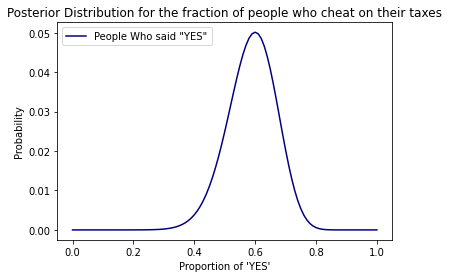

In [98]:
plt.title("Posterior Distribution for the fraction of people who cheat on their taxes")
plt.ylabel("Probability")
plt.xlabel("Proportion of 'YES'")
plt.plot(posterior42, color='navy')
plt.legend(['People Who said "YES"'])
plt.show()

In [99]:
posterior42.max_prob()

0.6

The most likely quantity in the posterior distribution is 0.6

**Exercise 4-3**


Suppose you want to test whether a coin is fair, but you don't want to spin it hundreds of times. So you make a machine that spins the coin automatically and uses computer vision to determine the outcome.

However, you discover that the machine is not always accurate. Specifically, suppose the probability is `y=0.2` that an actual heads is reported as tails, or actual tails reported as heads.

If we spin a coin `250` times and the machine reports `140` heads, what is the posterior distribution of` x`? What happens as you vary the value of y?


Text(0.5, 0, 'Proportion of heads')

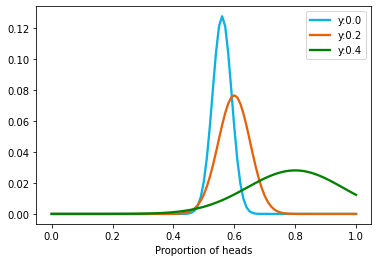

In [106]:
hypos43 = np.linspace(0, 1, 101)
prior43 = Pmf(1, hypos43)
dataset43 = 'H' * 140 + 'T' * 110
def update_unreliable(pmf, dataset, y):
    likelihood = {
        'H': (1-y) * hypos43 + y * (1-hypos43),
        'T': y * hypos43 + (1-y) * (1-hypos43)
    }
    for data in dataset:
        pmf *= likelihood[data]

    return pmf.normalize()
ys=[0.0,0.2,0.4]
cl=['#0CB2E3','#E3640C','green']
c=0
for y in ys:
  posterior43 = prior43.copy()
  update_unreliable(posterior43, dataset43, y)
  plt.plot(posterior43,color=cl[c],linewidth=2.3)
  c+=1
plt.legend([f'y:{y}' for y in ys])
plt.xlabel('Proportion of heads')

The posterior distribution of $x$ is most likely at 60 , while $y=0.2$ , and it increases as $y$ increases.

If we increase `y`, `x` increases threrefore, $ y ∝ x  $ (Proportional)

### *Exercise 4-4*


In preparation for an alien invasion, the Earth Defense League (EDL) has been working on new missiles to shoot down space invaders. Of course, some missile designs are better than others; let's assume that each design has some probability of hitting an alien ship, x.

Based on previous tests, the distribution of $x$ in the population of designs is approximately uniform between 0.1 and 0.4.

Now suppose the new ultra-secret **Alien Blaster 9000** is being tested. In a press conference, an EDL general reports that the new design has been tested twice, taking **two shots** during each test. The results of the test are confidential, so the general won't say how many targets were hit, but they report: "The same number of targets were hit in the two tests, so we have reason to think this new design is consistent."

Is this data good or bad? That is, does it increase or decrease your estimate of $x$ for the **Alien Blaster 9000**?

Hint: If the probability of hitting each target is  $x$ , the probability of hitting one target in both tests is  $[2x(1−x)]^2$ .

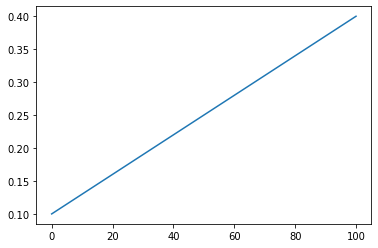

In [107]:
hypos44 = np.linspace(0.1,0.4,101) # suppose we have 100 instances of missiles fitting in that criteria.
prior44 = Pmf(1,hypos44)
plt.plot(hypos44)

In [112]:
x = hypos44
# Here's a specific version for n=2 shots per test
likes44_1 = [(1-x)**4, (2*x*(1-x))**2, x**4] #
likelihood44_1= np.sum(likes44_1, axis=0)
likelihood44_1

array([0.6886    , 0.68165258, 0.67482529, 0.6681166 , 0.66152498,
       0.6550489 , 0.64868688, 0.64243742, 0.63629904, 0.63027027,
       0.62434966, 0.61853576, 0.61282714, 0.60722238, 0.60172007,
       0.5963188 , 0.59101721, 0.5858139 , 0.58070752, 0.57569672,
       0.57078016, 0.56595651, 0.56122445, 0.55658268, 0.5520299 ,
       0.54756484, 0.54318623, 0.53889281, 0.53468332, 0.53055655,
       0.52651126, 0.52254624, 0.5186603 , 0.51485225, 0.5111209 ,
       0.5074651 , 0.5038837 , 0.50037554, 0.49693951, 0.49357449,
       0.49027936, 0.48705304, 0.48389443, 0.48080248, 0.47777612,
       0.4748143 , 0.47191599, 0.46908016, 0.4663058 , 0.46359191,
       0.4609375 , 0.45834159, 0.45580321, 0.45332142, 0.45089526,
       0.4485238 , 0.44620614, 0.44394135, 0.44172855, 0.43956684,
       0.43745536, 0.43539324, 0.43337964, 0.43141372, 0.42949464,
       0.4276216 , 0.4257938 , 0.42401044, 0.42227073, 0.42057393,
       0.41891926, 0.41730599, 0.41573337, 0.4142007 , 0.41270

In [113]:
from scipy.stats import binom

n = 2
likes44_2 = [binom.pmf(k, n, x)**2 for k in range(n+1)]
likelihood44_2 = np.sum(likes44_2, axis=0)

Text(0.5, 1.0, 'Likelihood of getting the same result')

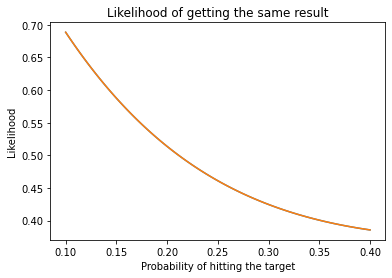

In [114]:
import matplotlib.pyplot as plt

plt.plot(x, likelihood44_1, label='special case')
plt.plot(x, likelihood44_2, label='general formula')
plt.xlabel('Probability of hitting the target')
plt.ylabel('Likelihood')
plt.title('Likelihood of getting the same result')

In [115]:
posterior44 = prior44 * likelihood44_1
posterior44.normalize()

49.129627998379995

Text(0.5, 1.0, 'Posterior distribution')

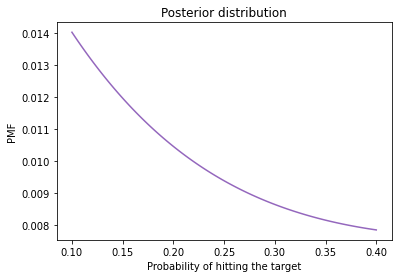

In [117]:
posterior44.plot(label='Two tests, two shots, same outcome',
               color='C4')
plt.xlabel('Probability of hitting the target')
plt.ylabel('PMF')
plt.title('Posterior distribution')